Image generation is the process of using AI models to create visual content based on text descriptions or existing images. This technology leverages deep learning to understand prompts and generate corresponding images, offering vast creative possibilities for artists, designers, and users in various fields.


The core of Image Generation is GAN. A GAN comprises of a Generator and a Discriminator.

Think of the Generator as an artist who wants to paint pictures but has no real-world experience (so he or she doesn't know what a car or cat looks like for example). As a result, this artist starts with a blank canvas and tries to turn it into an image that looks real. Of course, initially the generator is not very good, and the paintings look weird and random.

Next, there is the discriminator or the art critic. It looks at an image and tries to determine if it is a real image (from real-world data) or a fake one (created by the Generator). It looks at an image and gives it a high score if the image is real or a low score if it is fake.

Finally, the goal of the generator is to fool the discriminator into believing that the fake images are real. The goal of the discriminator is to catch the fake images and distinguish them from the real ones.

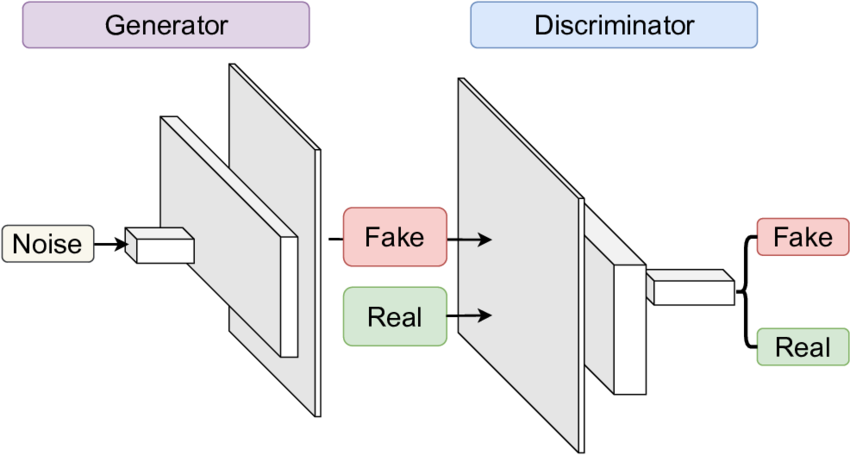

Credit: https://www.researchgate.net/figure/Generator-and-discriminator-of-the-GAN_fig2_341965995

Now that we know about how image generations work, let us try to create our own images.

First, let's create a Hugging Face account by visiting https://huggingface.co/. Hugging Face is a platform that provides a wide range of tools and models for machine learning and artificial intelligence.

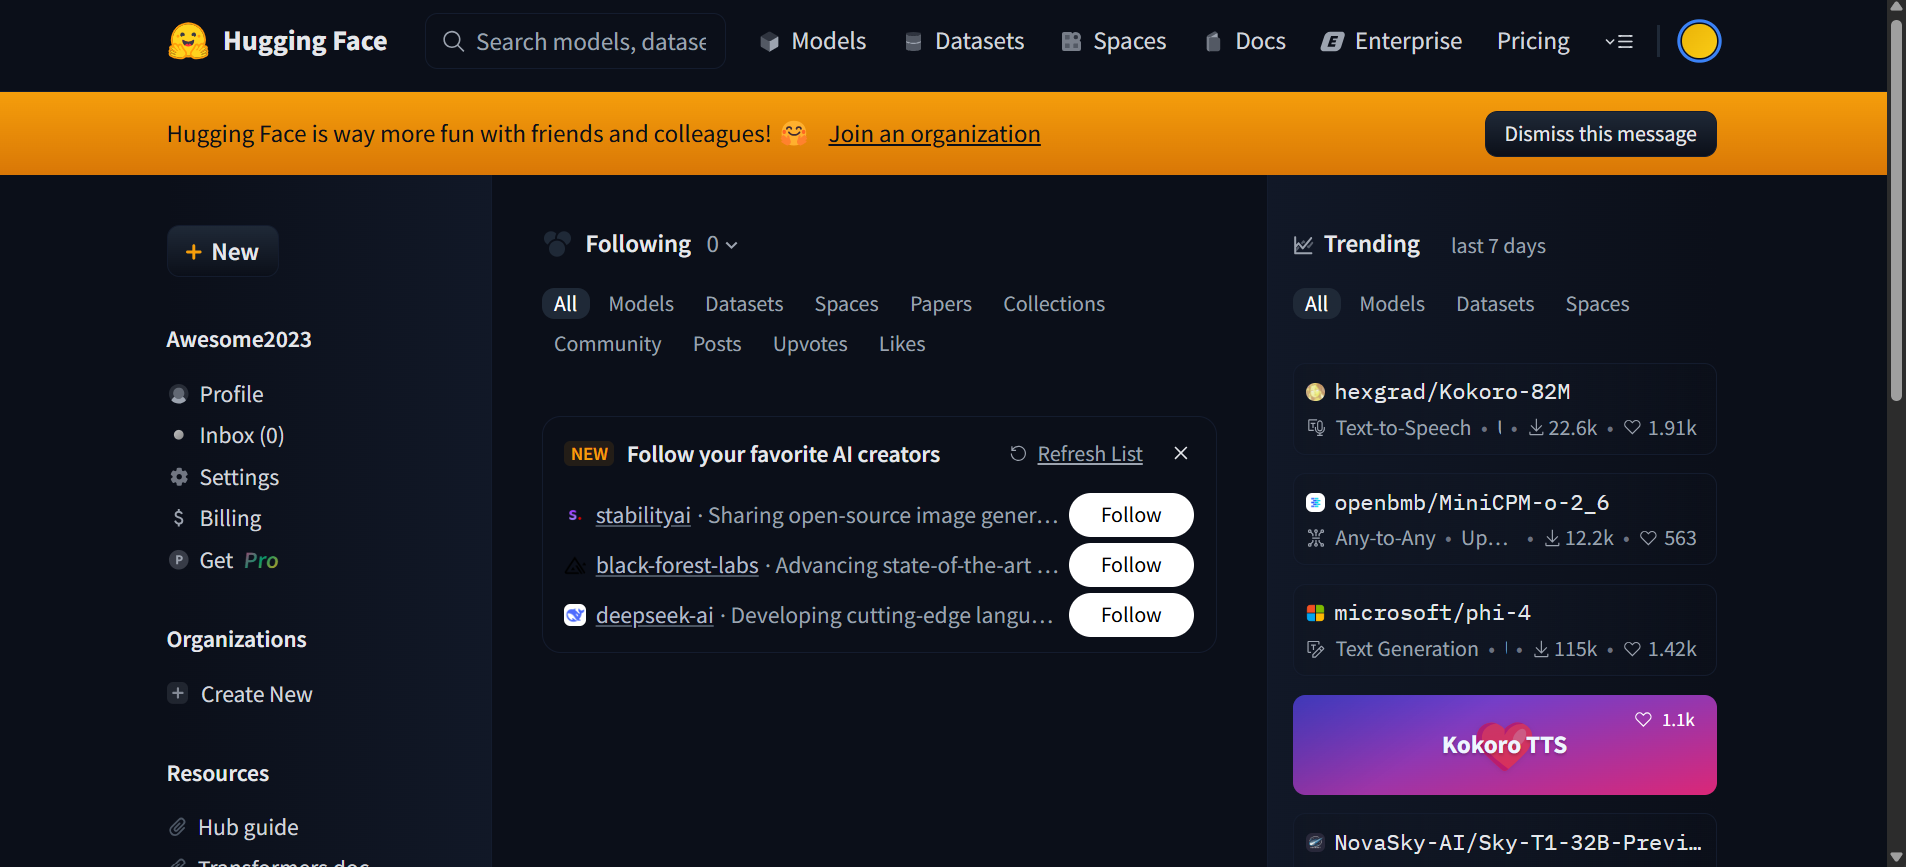

After creating an account, click on your profile and go to Access Tokens to create your own token.

In this tutorial, we are going to use Stability AI's Stable Diffusion, a tool that helps you create images from text descriptions. This means you can type something like “a cat wearing a space suit” and the model will generate an image based on that idea. Stability AI's Stable Diffusion is an easy-to-use and powerful tool for beginners who want to explore AI-generated art. You don't need to be an expert to get started; with just a few simple steps, you can create amazing and unique images from your own prompts. Let's get started!

In [ ]:
prompt = "A giant owl"
huggingface_api_key = "your_api_key"

In [ ]:
import requests

# Call Hugging Face API for image generation
image_payload = {
    "inputs": prompt,
}
headers = {
    "Authorization": f"Bearer {huggingface_api_key}",
}
response = requests.post(
    "https://api-inference.huggingface.co/models/stabilityai/stable-diffusion-3-medium-diffusers",
    json=image_payload,
    headers=headers
)

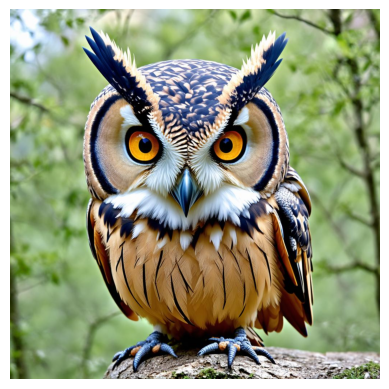

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt

if response.status_code == 200:
    image_data = response.content
    image = Image.open(io.BytesIO(image_data)).convert("RGB")

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Save the image
    image.save("image.jpg")
else:
    raise ValueError(f"Error generating image: {response.json().get('error', 'Unknown error')}")

That's a pretty nice owl! What if we wanted to convert it into a lego model and see how that looks like?

We can use the following model to help transfer a particular style to the above image as shown.

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

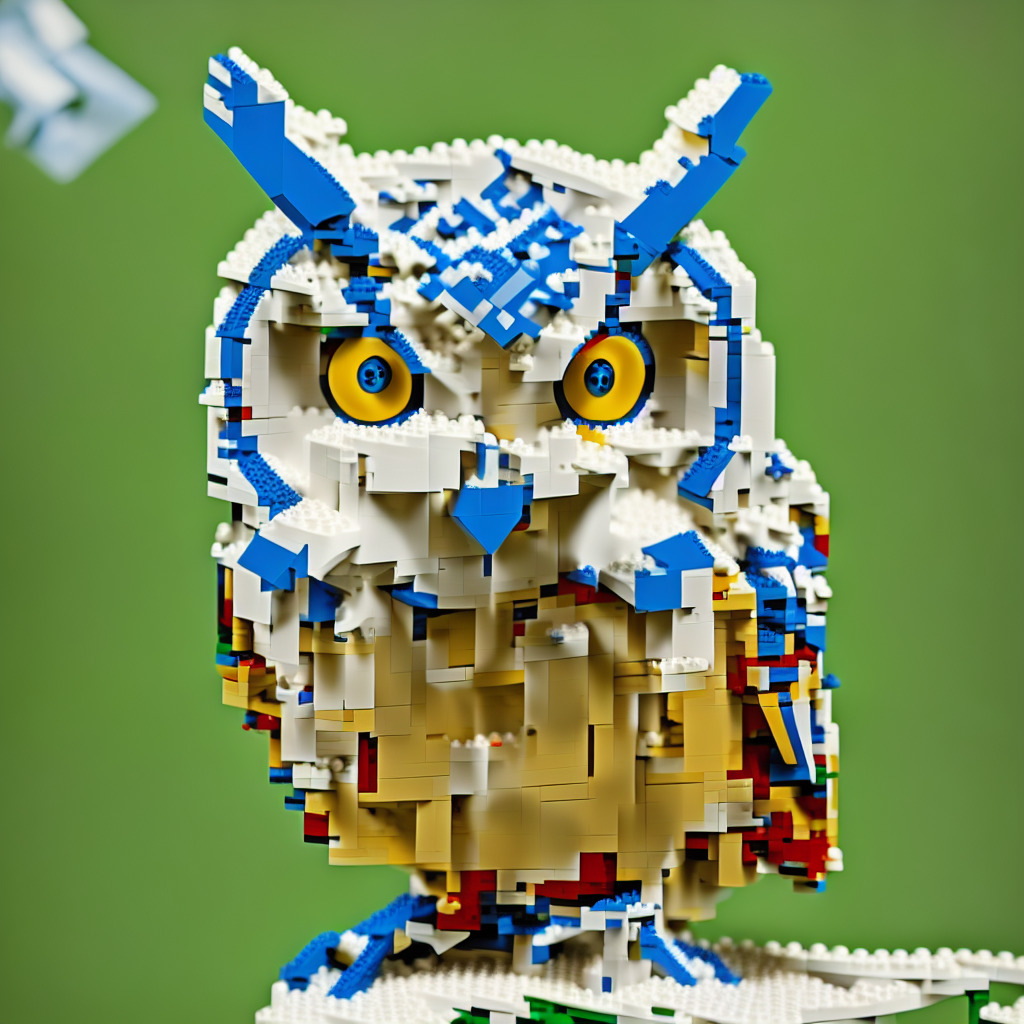

In [ ]:
prompt = "make it a lego model"
images = pipe(prompt, image=image, num_inference_steps=40, image_guidance_scale=1).images
images[0]